# Auswertung

In [1]:
#Benötigte Pakete
%matplotlib inline 
import numpy as np
import io
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.stats import chi2
plt.rcParams.update({'font.size': 20})
plt.rcParams["figure.figsize"] = 16, 9

In [2]:
def form(val,err): #form function for prints
        a = "{value:4.3f} ± {error:4.3f}".format(value=val,error=err)
        return a

## Teil 1: Betrieb als Kältemaschine

### Kälteleistung

Berechnung der Kälteleistung aus der Kompensationsmessung:

\begin{align}
    Q_2 &= \frac{U_H I_H}{f} &\text{von der Kältemaschine entzogene Wärmemenge}\\
    W_H &= \frac{U_H I_H}{f} &\text{Heizleistung der Wendel pro Umdrehung}
\end{align}

Diese kompensiert grade die erzugte Kälte des Motors und entspricht somit der Kälteleistung $W_K$ des Motors pro Umdrehung:
\begin{align}
    W_H \cdot f &= P_K &\text{(idealisiert)}\\
    \Rightarrow f \cdot W_K &= U_H \cdot I_H = P_K\\
\end{align}


In [3]:
U_H = 5.37 # Heizspannung [V]
Fehler_U_H = 0.01

I_H = 0.97 *5# Heizstrom [A]
Fehler_I_H = 0.01 *5

f = 285.0 /60 # Motordrehzahl [Hz]
Fehler_f = 10 /60

U_M = 24.0 # Motorspannung [V]
Fehler_U_M = 0.1

I_M = 3.1 # Motorstrom [A]
Fehler_I_M = 0.05

V_punkt = 254 /(1e6*60) #Volumenstrom des Kühlwassers [m^3/s]
Fehler_V_punkt = 5 /(1e6*60)

T_zu = 19.7 + 273.15 # Temperatur des Zuwassers [K]
Fehler_T_zu = 0.1

T_ab = 22.8 + 273.15 # Temperatur des Abwassers [K]
Fehler_T_ab = 0.1

c_W = 4180 # spezifische Wärmekapazität von Wasser [J/(kg*K)]
Fehler_c_W = 0.5

rho_W = 998 # Dichte von Wasser [kg/m^3]
Fehler_rho_W = 1

# Rechnungen
P_M = U_M*I_M # Motorleistung [W]
Fehler_P_M = abs(P_M)*np.sqrt((Fehler_U_M/U_M)**2+(Fehler_I_M/I_M)**2)

W_M = P_M/f # zugeführte mechanische Arbeit pro Umlauf [J]
Fehler_W_M = abs(W_M)*np.sqrt((Fehler_P_M/P_M)**2+(Fehler_f/f)**2)

Delta_T = T_ab-T_zu # Temperaturdifferenz von Zu- und Abwasser [K]
Fehler_Delta_T = np.sqrt(Fehler_T_zu**2+Fehler_T_ab**2)

P_H = U_H*I_H # Heizleistung [W]
Fehler_P_H = abs(P_H)*np.sqrt((Fehler_U_H/U_H)**2+(Fehler_I_H/I_H)**2)

W_H = P_H/f # dem Zylinder zugeführte Wärme pro Umlauf [J]
Fehler_W_H = abs(W_H)*np.sqrt((Fehler_P_H/P_H)**2+(Fehler_f/f)**2)

P_1 = c_W*rho_W*Delta_T*V_punkt # vom Kühlreislauf abgeführete Wärmeleistung [W]
Fehler_P_1 = abs(P_1)*np.sqrt((Fehler_c_W/c_W)**2+(Fehler_rho_W/rho_W)**2+(Fehler_Delta_T/Delta_T)**2
                              +(Fehler_V_punkt/V_punkt)**2)

Q_1 = P_1/f # vom Kühlreislauf abgeführte Wärme pro Umlauf [J]
Fehler_Q_1 = abs(Q_1)*np.sqrt((Fehler_P_1/P_1)**2+(Fehler_f/f)**2)

#Ausgabe
print('Heizleistung: ')
print('P_H =', form(P_H,Fehler_P_H), ' [W]')
print('')
print('vom Kühlreislauf abgeführte Wärmeleistung: ')
print('P_1 =', form(P_1,Fehler_P_1), ' [W]')
print('')
print('Motorleistung: ')
print('P_M =', form(P_M,Fehler_P_M), ' [W]')
print('')
print('dem Zylinder zugeführte Wärme pro Umlauf: ')
print('W_H =', form(W_H,Fehler_W_H), ' [J]')
print('')
print('vom Kühlreislauf abgeführte Wärme pro Umlauf: ')
print('Q_1 =', form(Q_1,Fehler_Q_1), ' [J]')
print('')
print('zugeführte mechanische Arbeit pro Umlauf: ')
print('W_M =', form(W_M,Fehler_W_M), ' [J]')

Heizleistung: 
P_H = 26.044 ± 0.273  [W]

vom Kühlreislauf abgeführte Wärmeleistung: 
P_1 = 54.746 ± 2.721  [W]

Motorleistung: 
P_M = 74.400 ± 1.239  [W]

dem Zylinder zugeführte Wärme pro Umlauf: 
W_H = 5.483 ± 0.201  [J]

vom Kühlreislauf abgeführte Wärme pro Umlauf: 
Q_1 = 11.525 ± 0.701  [J]

zugeführte mechanische Arbeit pro Umlauf: 
W_M = 15.663 ± 0.608  [J]


Die Kälteleistung $P_K$ ergibt sich zu:

\begin{align}
    P_K &= 26.044 \pm 0.273 \ \text{[W]}\\
\end{align}

### Wirkungsgrad und Energiebilanz

In [4]:
#Berechnung des Wirkungsgrades
eta1=P_H/P_M
deta1=eta1*np.sqrt((Fehler_P_M/P_M)**2+(Fehler_P_H/P_H)**2)
print('eta1 = ', form(eta1*100,deta1*100), ' [%]')

#Diskrepanz DeltaE
dE=-(Q_1-W_H-W_M)
ddE=np.sqrt(Fehler_Q_1**2+Fehler_W_H**2+Fehler_W_M**2)
print('dE = ', form(dE,ddE),' [J]')

eta1 =  35.006 ± 0.689  [%]
dE =  9.621 ± 0.950  [J]


Der Wirkungsgrad $\eta$ der Kältemaschine beträgt:
\begin{align}
    \eta = 35.0 \pm 0.7 \ \%
\end{align}

Die Energieverluste $\Delta E$ pro Zyklus betragen: 
\begin{align}
    \Delta E = 9.621 \pm 0.950 \ \text{[J]}
\end{align}

## Teil 2: Betrieb als Kältemaschine und Wärmepumpe

### Einlesen und Darstellen der Messdaten

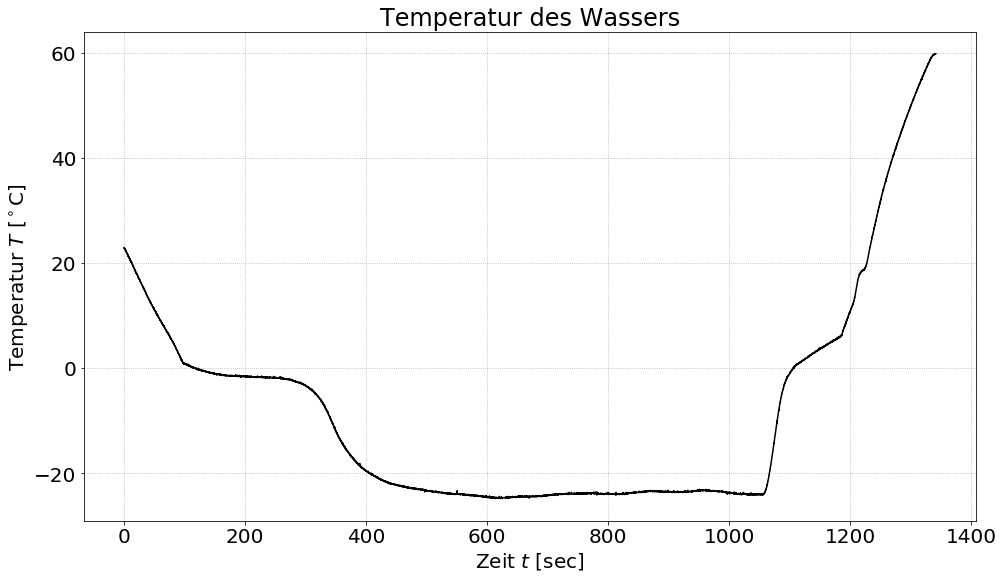

In [5]:
f = open('data/Aufgabe 2 Temperatur.txt', 'r')

# Read and ignore header lines
header1 = f.readline()
header2 = f.readline()
header3 = f.readline()
header4 = f.readline()
header5 = f.readline()

time = []
Temp = []

for line in f:
    a = line.strip('\t\n').split()
    t = float(a[0].replace(',','.'))
    time.append(t)
    T = float(a[1].replace(',','.'))
    Temp.append(T)

xdata = np.array(time)
ydata = np.array(Temp)

plt.plot(xdata,ydata, label='Temperaturverlauf', c='k')
plt.title('Temperatur des Wassers')
plt.xlabel('Zeit $t$ [sec]')
plt.ylabel('Temperatur $T$ [$^\circ$C]')
plt.grid(ls=':')
plt.show()

Das Diagramm zeigt die den Temperaturverlauf des Wassers im Reagenzglas. Sobald die Kältemaschine angestellt wird, nimmt die Temperatur linear ab, nahe dem Gefrierpunkt stagniert der Temperaturabfall sehr und flacht nahe der 0°C (gefrierpunkt von Wasser) fast vollständig ab. Grund dafür ist die sogenannte latente Wärme, dabei gibt das Wasser immernoch die gleiche Wärmemenge ab wie zuvor. Jedoch ist diese nicht in der Änderung der Kinetischen Energie erkennbar, sondern in der Bildung der Kristallstrukturen, in diesem Fall von Wassereis.

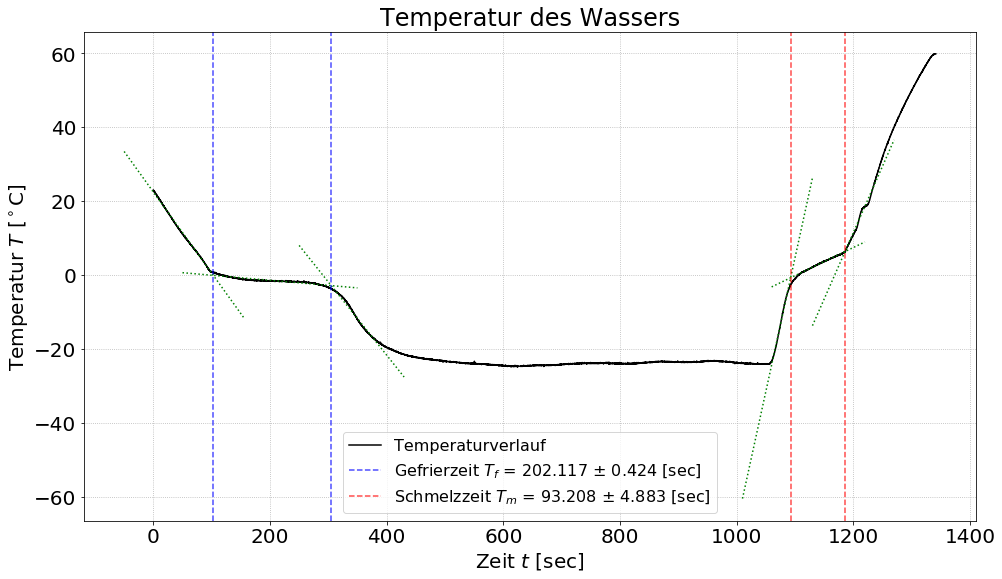

In [6]:
A1 = []
A2 = []
B1 = []
B2 = []

def line(x, m, b):
    return m * x + b
def intersect(m1,m2,b1,b2,fm1,fm2,fb1,fb2):
    xi = (b1-b2) / (m2-m1)
    Fehler_xi = np.sqrt((1/(m2-m1)*fb1)**2+(1/(m2-m1)*fb2)**2
                        +((b1-b2)/((m2-m1)**2)*fm2)**2
                        +((b2-b1)/((m2-m1)**2)*fm1)**2)
    yi = m1 * xi + b1
    return [xi,Fehler_xi]
def fit1(a,b):
    x_fit = np.linspace(min(xdata[a:b])-50,max(xdata[a:b])+50,50)
    popt, pcov = curve_fit(line, xdata[a:b], ydata[a:b])
    plt.plot(x_fit,line(x_fit,popt[0],popt[1]),ls=':',c='g')
    A1.append([popt[0],pcov[0][0]])
    B1.append([popt[1],pcov[1][1]])
def fit2(a,b):
    x_fit = np.linspace(min(xdata[a:b])-50,max(xdata[a:b])+50,50)
    popt, pcov = curve_fit(line, xdata[a:b], ydata[a:b])
    plt.plot(x_fit,line(x_fit,popt[0],popt[1]),ls=':',c='g')
    A2.append([popt[0],pcov[0][0]])
    B2.append([popt[1],pcov[1][1]])

plt.plot(xdata,ydata, label='Temperaturverlauf',c='k')
fit1(0,1050)
fit1(1000,3000)
fit1(3000,3800)
t1 = np.array(intersect(A1[0][0],A1[1][0],B1[0][0],B1[1][0],
                        A1[0][1],A1[1][1],B1[0][1],B1[1][1]))
t2 = np.array(intersect(A1[1][0],A1[2][0],B1[1][0],B1[2][0],
                        A1[1][1],A1[2][1],B1[1][1],B1[2][1]))

fit2(10600,10800)
fit2(11100,11700)
fit2(11800,12200)
t3 = np.array(intersect(A2[0][0],A2[1][0],B2[0][0],B2[1][0],
                        A2[0][1],A2[1][1],B2[0][1],B2[1][1]))
t4 = np.array(intersect(A2[1][0],A2[2][0],B2[1][0],B2[2][0],
                        A2[1][1],A2[2][1],B2[1][1],B2[2][1]))

plt.axvline(x=t1[0], color='b', linestyle='--',alpha = 0.7,
            label='Gefrierzeit $T_f$ = ' + form(t2[0]-t1[0],t2[1]-t1[1]) + ' [sec]')
plt.axvline(x=t2[0], color='b', linestyle='--',alpha = 0.7)
plt.axvline(x=t3[0], color='r', linestyle='--',alpha = 0.7,
            label='Schmelzzeit $T_m$ = ' + form(t4[0]-t3[0],t4[1]-t3[1]) + ' [sec]')
plt.axvline(x=t4[0], color='r', linestyle='--',alpha = 0.7)
plt.title('Temperatur des Wassers')
plt.xlabel('Zeit $t$ [sec]')
plt.ylabel('Temperatur $T$ [$^\circ$C]')
plt.grid(ls=':')
plt.legend(loc='best',fontsize=16)
plt.show()

\begin{align}
    T_f &= 202.117 \pm 0.424 \ \text{[sec]}\\
    T_m &= 93.208 \pm 4.883 \ \text{[sec]}
\end{align}

Die Gefrierzeit $T_f$ ist mehr als doppelt so lang wie die Schmelzzeit $T_m$ dies liegt daran dass das Gleichgewicht des systems bei Zimmertemperatur liegt ($300$ K). Beim abkühlen arbeitet man gegen das Gleichgewicht, beim Aufheizen hingegen arbeitet man mit dem Gleichgewicht. 

## Teil 3: Betrieb als Wärmekraftmaschine

### Energiebilanz der Leerlaufmessungen

Zu Berechnen sind Folgende Größen:
- Heizleistung $P_{el}$ \begin{align}
    P_{el} = U_H \cdot I_H  \end{align}
- Zugeführte Wärmemenge $Q_{el}$ \begin{align}
    Q_{el} = \frac{P_{el}}{f} = \frac{U_H \cdot I_H}{f} \end{align}
- Abgegebene Wärmemenge $P_{ab}$ \begin{align}
    P_{ab} = c_W \rho_W \Delta T \dot{V}  \end{align}
- Zugeführte Wärmemenge $Q_{ab}$ \begin{align}
    Q_{ab} = \frac{P_{ab}}{f} = \frac{c_W \rho_W \Delta T \dot{V}}{f} \end{align}

In [7]:
f_list = np.array([304, 304, 305])/60
f = np.mean(f_list) # [1/min]
Feler_f = 2 + np.std(f_list) # [1/min]

I_H_list = np.array([3.00, 3.01, 3.01])*5
I_H = np.mean(I_H_list) # [A]
Fehler_I_H = 0.01*5 + np.std(I_H_list) # [A]

U_H_list = np.array([13.72, 13.72, 13.73])
U_H = np.mean(U_H_list) # [V]
Fehler_U_H = 0.02 + np.std(U_H_list) # [V]

A_list = np.array([31450, 30880, 31290])
A = np.mean(A_list) # [hPa cm^3]
dA = np.std(A_list) # [hPa cm^3]

T3 = 3.5
dT3 = 1

P_el=U_H*I_H
dP_el=np.sqrt((Fehler_U_H/U_H)**2+(Fehler_I_H/I_H)**2)

Q_el=P_el/f
dQ_el=np.sqrt((dP_el/P_el)**2+(Feler_f/f)**2)

Q_ab=c_W*rho_W*T3*V_punkt/f
dQ_ab=np.sqrt((dT3/T3)**2+(Fehler_V_punkt/V_punkt)**2+(Feler_f/f)**2)

P_ab=c_W*rho_W*T3*V_punkt
dP_ab=np.sqrt((dT3/T3)**2+(Fehler_V_punkt/V_punkt)**2)

Q_pV=A*1e-4
dQ_pV=dA*1e-4

P_pV=Q_pV*f
dP_pV=np.sqrt((dQ_pV/Q_pV)**2+(Feler_f/f)**2)

eta_th=Q_pV/Q_el
deta_th=np.sqrt((dQ_pV/Q_pV)**2+(dQ_el/Q_el)**2)

print('f      =', form(f,Fehler_f), ' [Hz]')
print('P_el   =', form(P_el,dP_el),' [W]')
print('Q_el   =', form(Q_el,dQ_el),' [J]')
print('P_ab   =', form(P_ab,dP_ab),' [W]')
print('Q_ab   =', form(Q_ab,dQ_ab),' [J]')
print('P_pV   =', form(P_pV,dP_pV),' [W]')
print('Q_pV   =', form(Q_pV,dQ_pV),' [J]')
print('eta_th =',form(eta_th*100,deta_th*100), ' [%]')

f      = 5.072 ± 0.167  [Hz]
P_el   = 206.307 ± 0.005  [W]
Q_el   = 40.674 ± 0.396  [J]
P_ab   = 61.810 ± 0.286  [W]
Q_ab   = 12.186 ± 0.489  [J]
P_pV   = 15.829 ± 0.396  [W]
Q_pV   = 3.121 ± 0.024  [J]
eta_th = 7.672 ± 1.241  [%]


| $f$ [Hz]          	| $P_{el}$ [W]    	| $Q_{el}$ [J]    	| $P_{ab}$ [W]    	| $Q_{ab}$ [J]   	| $P_{pV}$ [W]   	| $Q_{pV}$ [J]      	| $\eta_{th}$ [%]   	|
|-------------------	|-----------------	|-----------------	|-----------------	|----------------	|----------------	|-------------------	|-------------------	|
| 5.1 $\pm$ 0.1 	| 206.307 $\pm$ 0.005 	| 40.7 $\pm$ 0.4 	| 61.8 $\pm$ 0.3 	| 12.2 $\pm$ 0.5 	| 15.8 $\pm$ 0.4 	| 3.121 $\pm$ 0.024 	| 7.672 $\pm$ 1.241 	|

### Motorverluste $Q_V$

Mit jedem Umlauf des Motors geht weitere Energie in Wärme Verloren. Dies sind die Moterverluste $Q_V$, sie ergeben sich aus den Gesamtverlusten der Anfangs zugeführten Wärmemenge $Q_{el}$: 

\begin{align}
    Q_V = Q_{el} - Q_{ab} - Q_{pV}
\end{align}

In [8]:
Q_V = Q_el - Q_ab - Q_pV
dQ_V = np.sqrt(dQ_el**2 + dQ_ab**2 + Q_pV**2)

Loss = Q_V/Q_el
dLoss = np.sqrt((1/Q_el *dQ_V)**2 + (Q_V/(Q_el**2)*dQ_el)**2)

print('Q_v =', form(Q_V,dQ_V), ' [J]')
print('Loss =', form(Loss*100,dLoss*100), ' [%]')


Q_v = 25.367 ± 3.183  [J]
Loss = 62.368 ± 7.850  [%]


\begin{align}
    Q_V = 25.4 \pm 3.2 \ \text{[J]}
\end{align}

Dies Entspricht einem Wärmeverlust von (62.4 $\pm$ 8) %. Dies ist vergleichbar mit heutigen Verbrennungsmotoren, allerdings kann dies Durch eine Bessere Isolierung der Heizspirale wahrscheinlich noch verbessert werden. Um dies zu überprüfen könnte man den Heizkolben mit Aluminiumfolie einwickeln, welche sicher einen Teil der Wärme zurückhalten würde. Es sind auf jeden Fall weitere Untersuchungen notwendig um genaure Aussagen zu treffen.

### Drehmomentmessung und effektiver Wirkungsgrad

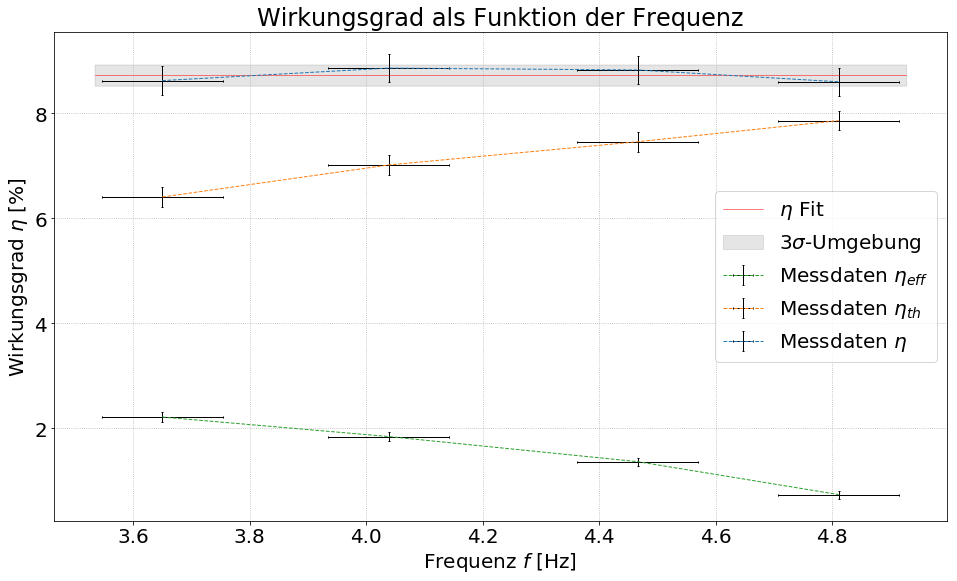

Wirkungsgrad:
eta     = 8.729 ± 0.067  [%]
Chi-Quadrat = 0.7548128567108934
Freiheitsgrade = 3
Chi-Quadrat reduziert = 0.2516042855702978
Wahrscheinlichkeit ein größeres oder gleiches Chi-Quadrat zu erhalten = 86.0 %


In [11]:
l = 25.0 /1e2 # Zaumlänge [m]
Fehler_l = 0.2 /1e2

F = np.array([0.80,0.60,0.40,0.20]) # Bremskraft [N]
Fehler_F = 0.02

I_H = np.array([3.01,3.01,3.01,3.00])*5
Fehler_I_H = 0.05 + np.std(I_H)

U_H = np.array([13.75, 13.71, 13.65, 13.62])
Fehler_U_H = 0.03 + np.std(U_H)

f = np.array([np.mean([219,220,218]),np.mean([240,242,245]),
              np.mean([267,268,269]),np.mean([289,287,290])])/60
Fehler_f = 5/60 + np.mean([np.std([219,220,218]),np.std([240,242,245]),
                        np.std([267,268,269]),np.std([289,287,290])])/60

W_pV = np.array([np.mean([36350,36570,36060]),np.mean([35490,36050,36010]),
                 np.mean([34270,34200,34460]),np.mean([33460,33120,33570])])*1e-4
Fehler_W_pV = np.mean([np.std([36350,36570,36060]),np.std([35490,36050,36010]),
                    np.std([34270,34200,34460]),np.std([33460,33120,33570])])*1e-4

D = l*F # Drehmoment [Nm]
Fehler_D = abs(D)*np.sqrt((Fehler_l/l)**2+(Fehler_F/F)**2)

W_D = 2*np.pi*D
Fehler_W_D = 2*np.pi*Fehler_D

P_el = U_H*I_H # Heizleistung [W]
Fehler_P_el = abs(P_el)*np.sqrt((Fehler_U_H/U_H)**2+(Fehler_I_H/I_H)**2)

Q_el = P_el/f # dem Zylinder zugeführte Wärme pro Umlauf [J]
Fehler_Q_el = abs(Q_el)*np.sqrt((Fehler_P_el/P_el)**2+(Fehler_f/f)**2)

eta_eff = W_D/Q_el*100
Fehler_eta_eff= abs(eta_eff)*np.sqrt((Fehler_W_D/W_D)**2+(Fehler_Q_el/Q_el)**2)

eta_th = W_pV/Q_el*100
Fehler_eta_th= abs(eta_th)*np.sqrt((Fehler_W_pV/W_pV)**2+(Fehler_Q_el/Q_el)**2)

eta = eta_eff+eta_th
Fehler_eta = Fehler_eta_eff+Fehler_eta_th

#Fitfunktion
from scipy import odr

def fit_func(p, x):
    (c) = p 
    return x*0+c

model = odr.Model(fit_func)

#darzustellende Daten
x = f
y = eta
delta_x = Fehler_f
delta_y = Fehler_eta

#Startparameter
para0 = [0]
data = odr.RealData(x, y, sx=delta_x, sy=delta_y)
odr = odr.ODR(data, model, beta0=para0 )
out = odr.run()


#1-Sigma
popt = out.beta
perr = out.sd_beta

#Sigma-Umgebung
nstd = 3 # um n-Sigma-Umgebung im Diagramm zu zeichnen

popt_top = popt+nstd*perr
popt_bot = popt-nstd*perr

#Plot-Umgebung
x_fit = np.linspace(min(x)-(max(x)-min(x))/10, max(x)+(max(x)-min(x))/10, 1000)
fit = fit_func(popt, x_fit)
fit_top = fit_func(popt_top, x_fit)
fit_bot = fit_func(popt_bot, x_fit)

#Plot
fig, ax = plt.subplots(1)
plt.errorbar(f, eta_eff, yerr=Fehler_eta_eff, xerr=Fehler_f, lw=1, ecolor='k', fmt ='C2--', capsize=1, label='Messdaten '+r'${{\eta}_{eff}}$')
plt.errorbar(f, eta_th, yerr=Fehler_eta_th, xerr=Fehler_f, lw=1, ecolor='k', fmt='C1--', capsize=1, label='Messdaten '+r'${{\eta}_{th}}$')
plt.errorbar(f, eta, yerr=Fehler_eta, xerr=Fehler_f, lw=1, ecolor='k', fmt='C0--', capsize=1, label='Messdaten '+r'${\eta}$')
plt.plot(x_fit, fit, color='r', lw=.5, label='${\eta}$ Fit')
ax.fill_between(x_fit, fit_top, fit_bot, color='k', alpha=.1, label=str(nstd)+r'$\sigma$'+'-Umgebung')
plt.title('Wirkungsgrad als Funktion der Frequenz')
plt.grid(ls=':')
plt.xlabel('Frequenz '+r'${f}$'+' '+'[Hz]')
plt.ylabel('Wirkungsgrad $\eta$ [%]')
plt.legend(loc='best')
plt.show()

#Chi-Quadrat orthogonal
dof = x.size-popt.size
chisquare = out.sum_square
chisquare_red = chisquare/dof
prob = round(1-chi2.cdf(chisquare,dof),2)*100

#Auswertung
eta_mean = popt[0]
Fehler_eta_mean = perr[0]

#Ausgabe
print('Wirkungsgrad:')
#print('eta_th  =', form(eta_th,Fehler_eta_th), ' [%]')
#print('eta_eff =', form(eta_eff,Fehler_eta_eff), ' [%]')
print('eta     =', form(eta_mean,Fehler_eta_mean), ' [%]')
print('Chi-Quadrat =', chisquare)
print('Freiheitsgrade =', dof)
print('Chi-Quadrat reduziert =', chisquare_red)
print('Wahrscheinlichkeit ein größeres oder gleiches Chi-Quadrat zu erhalten =', prob, '%')

Der Thermische und der Effektive Wirkungsgrad unterscheiden sich voneinander weil sie ganz anders berechnet werden. Die Fläche im pV Diagram ist eine direkte Messung des Prozesses der den Motor antreibt. Wohingegen der effektive Wirkungsgrad über die Bremskraft gemessen wird, die zusätzliche Reibungskräfte, und somit Verluste verursacht. Der Effektive Wirkungsgrad misst die Energie die am Ende nutzbar ist. Der Thermische Wirkungsgrad misst die Energie welche die Kolben bewegt. Dreht sich der Motor langsamer so ist der Prozess im inneren Effektiver weil das Antriebsgas mehr Zeit hat zum abkühlen, Das Bremsen erhöht die effizienz des Stirlingprozesses. Reduziert aber den mechanischen Nutzen den man von diesem effektiv erhalten möchte. Der berechnete Wirkungsgrad $\eta$ ist:

\begin{align}
    \eta = 8.729 \pm 0.067 \ \text{[\%]}
\end{align}